# Project - Deliverables

## Part 1: Data Pre-Processing

## Introduction


We are going to look at the census data which was extracted by Barry Becker from the 1994 Census database.The name of our dataset is "adult". In this dataset we have 14 features/attributes(age, workclass, fnlwgt,education,education num,marital status,occupation, relationship,race,sex,capital_gain,capital_loss,hrs per week and native country) and 1 target variable - Income(binary). Using all the formerly mentioned attributes our target(income per annum) variable is classified into two categories 
<=50k 
and >50k per year.Since this dataset is old and has been collected in 1994 in order to make use of this dataset in recent times we need to add another column called income_adjusted column by using the inflation rate for united states we are going to calculate the equivalent amount of 50k per year in 1994 to the per annum income in 2023. This step will be explained in detail while exploring the dataset. We'll be focusing on the data of United States because of the dominance of service and tech industry in US. 

This classification model can be used in many ways for service based industries like Insurance, Credit card companies, Marketing companies where targeted customer marketing is essential and they'll know which sample of population is more prone to buy their product or service. This project will be in two parts

In the First part data pre-processing is done where we clean the data, and prepare it for data analysis.(Steps are explained in detail further).
In the Second part we run ML models to classify population based on their annual income.(Another Notebook)


In this Notebook we will demonstrate the data pre-processing steps. A glimpse of the following tasks is provided below.

1. Loading data into a dataframe.
2. Explore the shape of the data.
3. Rename column names.
4. Drop any columns we don't require to decrease dimensionality and complexity.
5. Identify missing data.
6. Drop rows with too many missing data measures(typically a threshold of 10% missing values in each column).
7. Impute the missing values for rows that are only missing very small number of values.
8. Dummy encoding of the categorical variables.
9. Store the pre-processed data in to a csv file for running the models using this dataset.

Let's begin the process by importing required libraries.

## Purpose of this classification.


- This classification can be used to solve many business problems especially in marketing, income categories are used to target specific customer segments. Businesses may tailor their marketing strategies and product offerings based on income groups. For example, luxury brands target customers with higher income, while discount stores target budget-conscious consumers.
- Income classification is crucial in market research to analyze consumer behavior, spending habits, and product preferences within different income groups. This information helps companies optimize their product lines and marketing campaigns.
- In the financial industry, income classification is essential for assessing credit risk. Lenders use income data to determine an applicant's ability to repay a loan. Different income categories may influence lending decisions and interest rates.
- And many more uses like the government will draft welfare programs based on the income distribution aka disparities among different genders and race wise distribution to embrace diversity and welfare of the people. Income classifications are often included in consumer surveys to segment survey responses and analyze data based on income groups. This helps researchers draw insights from survey data.

These are some of the uses of this classification, which ensures it's reproducibility and interpretability because of the breakdown of each step followed in this analysis and data pre-processing.

## 0.  Import the required libraries

We use the pandas, the Python data anlysis library, for handling data & to make it analysis ready.

In [53]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pylab as plt
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

Now that we've imported the required libraries, let's import our dataset into our python environment for data cleaning and data pre-processing.

## 1.Import Data

In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

# Combine into a single dataframe
adult_df = pd.concat([X, y], axis=1)

To check whether the data is correctly imported or not we can look at the first 10 rows of our dataframe using `head` method in dataframes.

In [63]:
adult_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Since this dataset is old and has been collected in 1994 in order to make use of this dataset in recent times we need to add another column called income_adjusted column  where using the inflation rate for US we are going to calculate the equivalent amount of 50k per year in 1994 to the per annum income in 2023. We can do this by appending the new income_adjusted column to this dataset. According to U.S. Bureau of Labor Statistics the cumulative inflation from 1994 to 2023 was 107.68% which accounts for average inflation rate per year as 2.55% (this was based on Consumer Price Index).

In [64]:
avg_inflation_rate_per_year = 0.0255

num_of_years = 2023 - 1994

income_2023 = 50000 *(1+0.0255)**num_of_years

round(income_2023)

103778

In [65]:
adult_df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

>- Here we are observing 4 categories of the data but in real there are only 2 categories we are going to sort that and proceed with our new adjusted income column. So 50k per year in 1994 accounts for 103778 dollars per annum in 2023. Now we'll be adding a new column income_adjusted with threshold 104k to our dataset according to our recent dollar value and inflation rate which adds more value to our analysis. Let's do it 

In [66]:
adult_df['income'] = adult_df['income'].str.replace('<=50K.', '<=50K', regex=True).str.replace('>50K.', '>50K', regex=True)

In [67]:
def adjust_income(income):
    if income == '>50K':
        return '>104K'
    elif income == '<=50K':
        return '<=104K'
    else:
        return income

adult_df['income_adjusted'] = adult_df['income'].apply(adjust_income)

adult_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_adjusted
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,<=104K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,<=104K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,<=104K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,<=104K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,<=104K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,<=104K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,<=104K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,>104K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,>104K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,>104K


We can check for the unique values in our new income_adjusted column to verify that we've done the transformation correctly.

In [68]:
adult_df['income_adjusted'].unique()

array(['<=104K', '>104K'], dtype=object)

In [69]:
# drop income column since we don't need it anymore

adult_df.drop('income', axis=1, inplace=True)

In [70]:
adult_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_adjusted
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=104K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=104K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=104K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=104K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=104K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=104K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=104K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>104K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>104K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>104K


Since we are adjusting income for inflation to compare it with a certain financial goal or threshold, it might not be necessary to adjust capital gains and losses, as they represent different aspects of financial activity.

>- Inflation Impact: The impact of inflation on capital gains and losses may vary depending on the specific assets involved. Some assets may appreciate or depreciate differently compared to the average inflation rate. Therefore, adjusting capital gains and losses for inflation might not be straightforward and could introduce complexity. That is why it has been avoided in this data pre-processing 

## 2. Explore the dimensions of our dataset

Since we've loaded the data correctly it's time to explore the dimensions of our dataframe(rows & columns). We can do this using `shape` method on our dataframe.

In [71]:
adult_df.shape

#Store rows & columns in rows and cols variables
rows = adult_df.shape[0]
cols = adult_df.shape[1]

# Print them using string formatting

print(f"Number of Rows = {rows}\nNumber of Colums = {cols}")

Number of Rows = 48842
Number of Colums = 15


Here we explored the dimensions of our dataset, with 48842 rows and 15 features where 1 column is our target variable and 14 are our attributes/features  

## 3. Rename Columns

Frequently, column names may contain spaces or mis-spelled words, leading to the need for renaming columns. We can obtain the column names by accessing the `columns` method on the DataFrame.

In [72]:
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_adjusted'],
      dtype='object')

Here the column names are all in lower cases and are separated by hyphen between the words in a sinlge column name. For better interpretability we are changing those column names into upper case and replacing the hyphen with underscore.

In [73]:
adult_df.columns = adult_df.columns.str.upper()
adult_df.columns

Index(['AGE', 'WORKCLASS', 'FNLWGT', 'EDUCATION', 'EDUCATION-NUM',
       'MARITAL-STATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX',
       'CAPITAL-GAIN', 'CAPITAL-LOSS', 'HOURS-PER-WEEK', 'NATIVE-COUNTRY',
       'INCOME_ADJUSTED'],
      dtype='object')

In [74]:
adult_df.columns = [s.strip().replace('-', '_') for s in adult_df.columns]
adult_df.columns

Index(['AGE', 'WORKCLASS', 'FNLWGT', 'EDUCATION', 'EDUCATION_NUM',
       'MARITAL_STATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX',
       'CAPITAL_GAIN', 'CAPITAL_LOSS', 'HOURS_PER_WEEK', 'NATIVE_COUNTRY',
       'INCOME_ADJUSTED'],
      dtype='object')

we can also convert the column names using rename method

In [75]:
adult_df = adult_df.rename(columns = {"WORKCLASS":"WORK_CLASS"})
adult_df.columns

Index(['AGE', 'WORK_CLASS', 'FNLWGT', 'EDUCATION', 'EDUCATION_NUM',
       'MARITAL_STATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX',
       'CAPITAL_GAIN', 'CAPITAL_LOSS', 'HOURS_PER_WEEK', 'NATIVE_COUNTRY',
       'INCOME_ADJUSTED'],
      dtype='object')

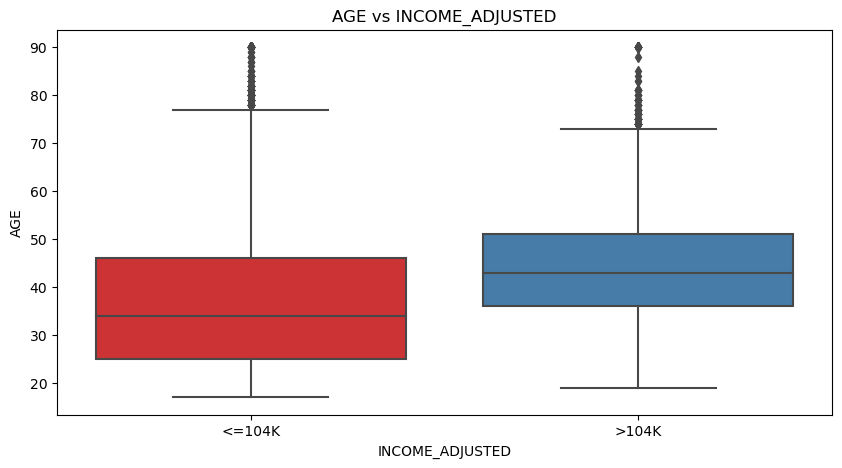

array(['<=104K', '>104K'], dtype=object)

In [76]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='INCOME_ADJUSTED', y='AGE', data=adult_df)
plt.title(f'AGE vs INCOME_ADJUSTED')
plt.show()
adult_df['INCOME_ADJUSTED'].unique()

In [77]:
cont_feature_col = ['AGE', 'FNLWGT', 'EDUCATION_NUM', 'CAPITAL_GAIN', 'CAPITAL_LOSS', 'HOURS_PER_WEEK']

# Create an empty dictionary to store summary information for each feature
outliers = {
    'Name of the Column': [],
    'Total Outliers': [],
    'Percentage Outliers': [],
    'Median': [],
    'Mean': [],
    'IQR': []
}

Income_1_df = adult_df[adult_df['INCOME_ADJUSTED'] == '<=104K']
Income_2_df = adult_df[adult_df['INCOME_ADJUSTED'] == '>104K']

for df, income_category in zip([Income_1_df, Income_2_df], ['<=104K', '>104K']):

    for col in cont_feature_col:
        # Calculate IQR for each column
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1

        # Detect outliers
        is_outlier = np.logical_or((df[col] < (q1 - 1.5 * IQR)), (df[col] > (q3 + 1.5 * IQR)))

        # Count the number of outliers and calculate the percentage
        total_outliers = is_outlier.sum()
        percentage_outliers = (total_outliers / len(df)) * 100

        # Calculate the median, mean, and IQR
        median = df[col].median()
        mean = df[col].mean()

        # Add the information to the dictionary
        outliers['Name of the Column'].append(f"{col} ({income_category})")
        outliers['Total Outliers'].append(total_outliers)
        outliers['Percentage Outliers'].append(percentage_outliers)
        outliers['Median'].append(median)
        outliers['Mean'].append(mean)
        outliers['IQR'].append(IQR)

# Create a DataFrame to summarize the outliers
outlier_df = pd.DataFrame(outliers)

# Display the DataFrame
outlier_df

,Name of the Column,Total Outliers,Percentage Outliers,Median,Mean,IQR
0,AGE (<=104K),207,0.557126,34.0,36.872184,21.0
1,FNLWGT (<=104K),1089,2.930965,178811.0,190039.565523,121707.0
2,EDUCATION_NUM (<=104K),12911,34.749024,9.0,9.598493,1.0
3,CAPITAL_GAIN (<=104K),1544,4.155565,0.0,147.010308,0.0
4,CAPITAL_LOSS (<=104K),1138,3.062845,0.0,54.151931,0.0
5,HOURS_PER_WEEK (<=104K),11706,31.505854,40.0,38.840048,5.0
6,AGE (>104K),90,0.770086,43.0,44.275178,15.0
7,FNLWGT (>104K),362,3.097459,176729.0,188470.574570,114562.5
8,EDUCATION_NUM (>104K),139,1.189356,12.0,11.602807,3.0
9,CAPITAL_GAIN (>104K),2491,21.314281,0.0,4042.239497,0.0


In [78]:
percentage_data = {}
category_percentages = adult_df['WORK_CLASS'].value_counts(normalize=True) * 100
percentage_data['WORK_CLASS'] = category_percentages
percentage_df = pd.DataFrame(percentage_data)
percentage_df.head(3)

,WORK_CLASS
Private,70.816015
Self-emp-not-inc,8.066167
Local-gov,6.549844


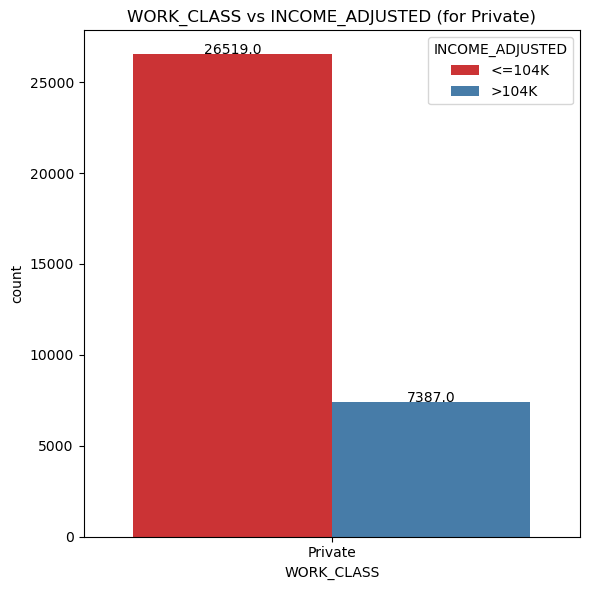

In [79]:
us_data = adult_df[adult_df['WORK_CLASS'] == 'Private']

# Set a color palette for the plot
sns.set_palette("Set1")

# Create a figure and axes
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='WORK_CLASS', hue='INCOME_ADJUSTED', data=us_data)
plt.title('WORK_CLASS vs INCOME_ADJUSTED (for Private)')

# Annotate the bars with their heights
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.tight_layout()
plt.show()

In [80]:
percentage_data = {}
category_percentages = adult_df['RELATIONSHIP'].value_counts(normalize=True) * 100
percentage_data['RELATIONSHIP'] = category_percentages
percentage_df = pd.DataFrame(percentage_data)
percentage_df

,RELATIONSHIP
Husband,40.366897
Not-in-family,25.762663
Own-child,15.521477
Unmarried,10.493018
Wife,4.772532
Other-relative,3.083412


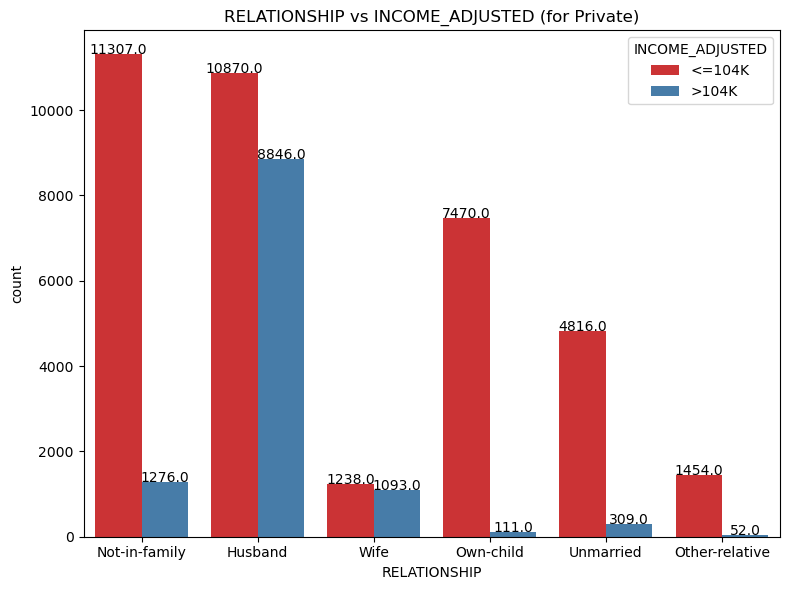

In [81]:
# Set a color palette for the plot
sns.set_palette("Set1")

# Create a figure and axes
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='RELATIONSHIP', hue='INCOME_ADJUSTED', data=adult_df)
plt.title('RELATIONSHIP vs INCOME_ADJUSTED (for Private)')

# Annotate the bars with their heights
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.tight_layout()
plt.show()

In [82]:
percentage_data = {}
category_percentages = adult_df['RACE'].value_counts(normalize=True) * 100
percentage_data['RACE'] = category_percentages
percentage_df = pd.DataFrame(percentage_data)
percentage_df

,RACE
White,85.504279
Black,9.592154
Asian-Pac-Islander,3.110028
Amer-Indian-Eskimo,0.962287
Other,0.831252


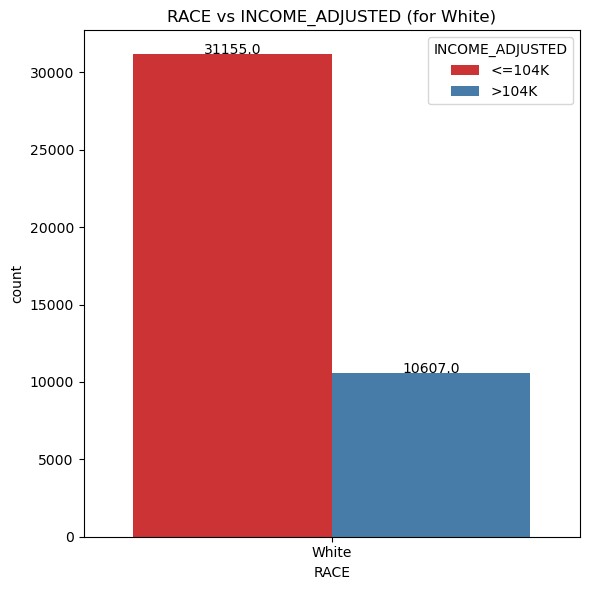

In [83]:
us_data = adult_df[adult_df['RACE'] == 'White']

# Set a color palette for the plot
sns.set_palette("Set1")

# Create a figure and axes
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='RACE', hue='INCOME_ADJUSTED', data=us_data)
plt.title('RACE vs INCOME_ADJUSTED (for White)')

# Annotate the bars with their heights
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.tight_layout()
plt.show()

In [84]:
percentage_data = {}
category_percentages = adult_df['SEX'].value_counts(normalize=True) * 100
percentage_data['SEX'] = category_percentages
percentage_df = pd.DataFrame(percentage_data)
percentage_df

,SEX
Male,66.848204
Female,33.151796


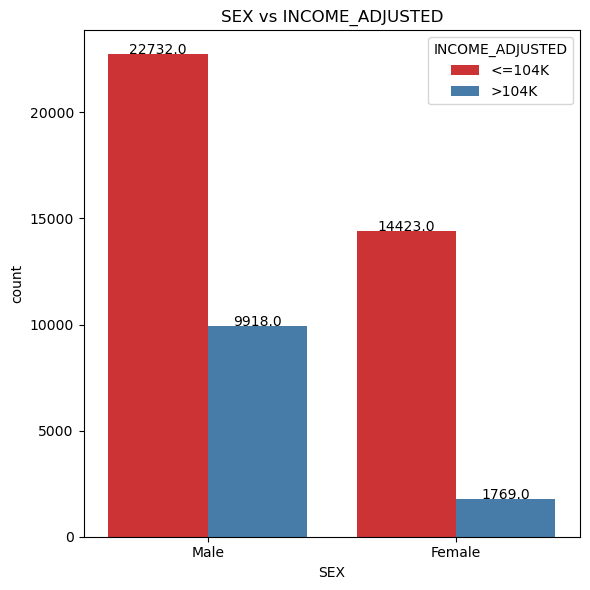

In [85]:
# Set a color palette for the plot
sns.set_palette("Set1")

# Create a figure and axes
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='SEX', hue='INCOME_ADJUSTED', data=adult_df)
plt.title('SEX vs INCOME_ADJUSTED')

# Annotate the bars with their heights
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.tight_layout()
plt.show()

In [86]:
percentage_data = {}
category_percentages = adult_df['OCCUPATION'].value_counts(normalize=True) * 100
percentage_data['OCCUPATION'] = category_percentages
percentage_df = pd.DataFrame(percentage_data)
percentage_df.head(10)

,OCCUPATION
Prof-specialty,12.891637
Craft-repair,12.766313
Exec-managerial,12.712006
Adm-clerical,11.719860
Sales,11.496366
Other-service,10.282814
Machine-op-inspct,6.312140
Transport-moving,4.918957
Handlers-cleaners,4.327847
?,3.849528


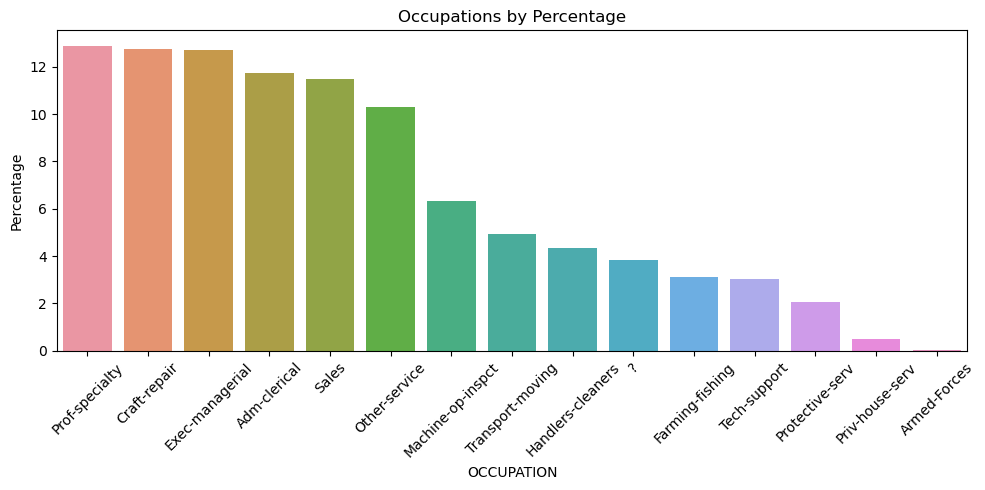

In [87]:
# Calculate the percentage of each category within the 'OCCUPATION' column
category_percentages = adult_df['OCCUPATION'].value_counts(normalize=True) * 100

# Create a DataFrame with the occupations and their percentages
df = pd.DataFrame({'OCCUPATION': category_percentages.index, 'Percentage': category_percentages.values})

plt.figure(figsize=(10, 5))  
sns.barplot(x='OCCUPATION', y='Percentage', data=df)
plt.title('Occupations by Percentage')
plt.xticks(rotation=45) 

# Display the plot
plt.tight_layout()
plt.show()

In [88]:
percentage_data = {}
category_percentages = adult_df['EDUCATION'].value_counts(normalize=True) * 100
percentage_data['EDUCATION'] = category_percentages
percentage_df = pd.DataFrame(percentage_data)
percentage_df.head()

,EDUCATION
HS-grad,32.316449
Some-college,22.271815
Bachelors,16.430531
Masters,5.439990
Assoc-voc,4.219729


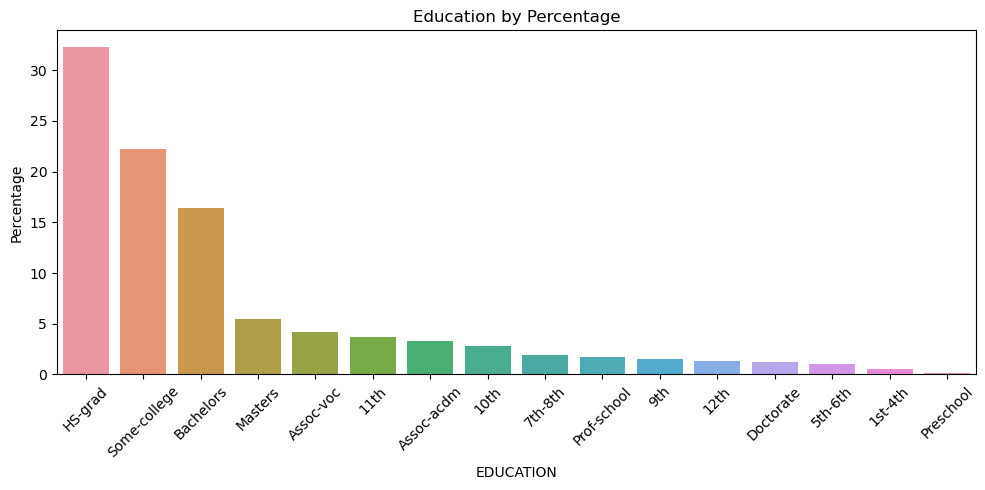

In [89]:
# Calculate the percentage of each category within the 'OCCUPATION' column
category_percentages = adult_df['EDUCATION'].value_counts(normalize=True) * 100

# Create a DataFrame with the occupations and their percentages
df = pd.DataFrame({'EDUCATION': category_percentages.index, 'Percentage': category_percentages.values})

plt.figure(figsize=(10, 5))  
sns.barplot(x='EDUCATION', y='Percentage', data=df)
plt.title('Education by Percentage')
plt.xticks(rotation=45)  

# Display the plot
plt.tight_layout()
plt.show()

In [90]:
percentage_data = {}
category_percentages = adult_df['MARITAL_STATUS'].value_counts(normalize=True) * 100
percentage_data['MARITAL_STATUS'] = category_percentages
percentage_df = pd.DataFrame(percentage_data)
percentage_df.head()

,MARITAL_STATUS
Married-civ-spouse,45.819172
Never-married,32.998239
Divorced,13.580525
Separated,3.132550
Widowed,3.107981


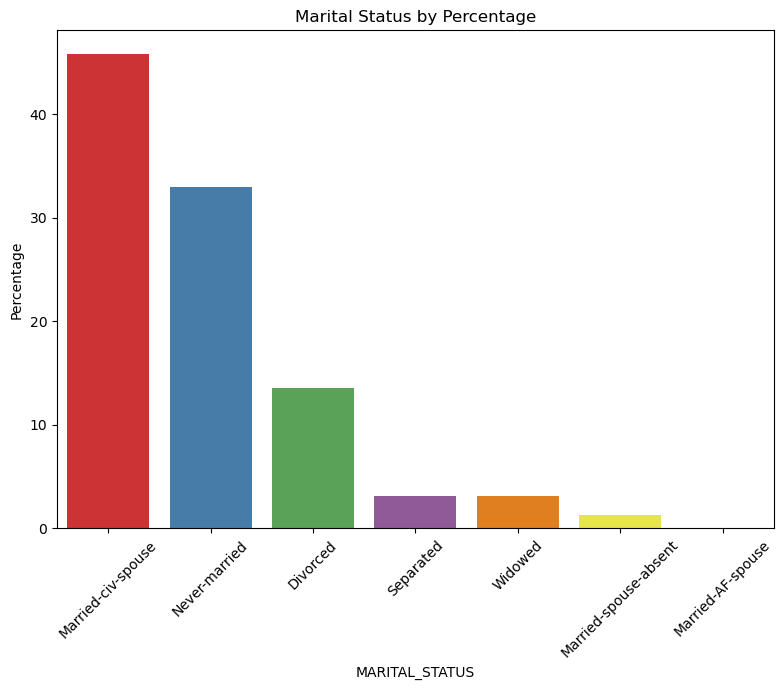

In [91]:
# Calculate the percentage of each category within the 'OCCUPATION' column
category_percentages = adult_df['MARITAL_STATUS'].value_counts(normalize=True) * 100

# Create a DataFrame with the occupations and their percentages
df = pd.DataFrame({'MARITAL_STATUS': category_percentages.index, 'Percentage': category_percentages.values})

plt.figure(figsize=(8, 7))  
sns.barplot(x='MARITAL_STATUS', y='Percentage', data=df)
plt.title('Marital Status by Percentage')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [92]:
percentage_data = {}
category_percentages = adult_df['NATIVE_COUNTRY'].value_counts(normalize=True) * 100
percentage_data['NATIVE_COUNTRY'] = category_percentages
percentage_df = pd.DataFrame(percentage_data)
percentage_df.head(5)

,NATIVE_COUNTRY
United-States,90.248723
Mexico,1.958079
?,1.200379
Philippines,0.607396
Germany,0.424148


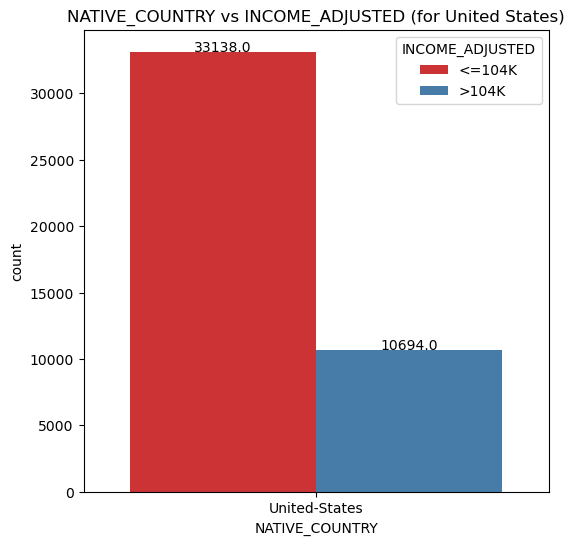

In [93]:
us_data = adult_df[adult_df['NATIVE_COUNTRY'] == 'United-States']

# Set a color palette for the plot
sns.set_palette("Set1")

plt.figure(figsize=(6, 6))
ax = sns.countplot(x='NATIVE_COUNTRY', hue='INCOME_ADJUSTED', data=us_data)
plt.title('NATIVE_COUNTRY vs INCOME_ADJUSTED (for United States)')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

## 4. Drop Unnecessary columns

In this dataset we have redundant columns which help in anything but predicting a person's income. So it's better to remove such columns and decrease dimensionality to reduce the computational cost and complexity of the dataset while running models.

1. We decided to remove the columns Education Num as Education and Education Num suggest the same thing keeping Education would be more informative as it also describes the person's level of education without much calculation.


2. Relationship is also redundant,since we already have "Marital Status" and "Sex" as features. It represents the individual's role in the family. In our ML Prediction FNLWGT is also unnecessary to us as it is mostly used in survey sampling to show the weightage of each person in the sample typically used for statistical tests it doesn't effect our prediction. So Let's drop the EDUCATION_NUM, FNLWGT and RELATIONSHIP columns which are redundant for our prediction. 


3. Occupation(OCCUPATION) and work_class nearly suggest the same thing as we are not looking for each occupation it would be more informative if we look at the distribution of income for all the work classes rather than just looking at each occupation which is cumbersome and prone to overfitting as the dimensionality of the data will also be increased after encoding. 

 Let's also look at the NATIVE_COUNTRY column to see if it is an adequate predictor or not.

In [94]:
country_counts = adult_df['NATIVE_COUNTRY'].value_counts()

# Display the country counts
country_counts

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Here in the adult_df, NATIVE_COUNTRY column United_states has almost 90% of the values where as all the other countries contribute to the remaining 10% so this column wouldn't have enough diversity to account for predictor so it is better to drop this column for better analysis and accurate prediction.

In [95]:
columns_to_drop = ['RELATIONSHIP', 'EDUCATION_NUM','FNLWGT','NATIVE_COUNTRY', 'OCCUPATION']
adult_df = adult_df.drop(columns=columns_to_drop, axis=1)

In [96]:
adult_df.head(10)

,AGE,WORK_CLASS,EDUCATION,MARITAL_STATUS,RACE,SEX,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,INCOME_ADJUSTED
0,39,State-gov,Bachelors,Never-married,White,Male,2174,0,40,<=104K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,White,Male,0,0,13,<=104K
2,38,Private,HS-grad,Divorced,White,Male,0,0,40,<=104K
3,53,Private,11th,Married-civ-spouse,Black,Male,0,0,40,<=104K
4,28,Private,Bachelors,Married-civ-spouse,Black,Female,0,0,40,<=104K
5,37,Private,Masters,Married-civ-spouse,White,Female,0,0,40,<=104K
6,49,Private,9th,Married-spouse-absent,Black,Female,0,0,16,<=104K
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,White,Male,0,0,45,>104K
8,31,Private,Masters,Never-married,White,Female,14084,0,50,>104K
9,42,Private,Bachelors,Married-civ-spouse,White,Male,5178,0,40,>104K


## 5. Identify Categorical data

Categorical data pertains to the representation of distinct categories and should not be manipulated as numerical values because it lacks quantitative attributes. To do that we need to look at the datatypes of all the columns. Let's do it.

In [97]:
adult_df.dtypes

AGE                 int64
WORK_CLASS         object
EDUCATION          object
MARITAL_STATUS     object
RACE               object
SEX                object
CAPITAL_GAIN        int64
CAPITAL_LOSS        int64
HOURS_PER_WEEK      int64
INCOME_ADJUSTED    object
dtype: object

Here we have WORKCLASS,EDUCATION,MARITAL_STATUS, RACE and SEX where we will be converting the INCOME_ADJUSTED(Target) into a binary categorical variable later in the notebook after changing the data types of the above mentioned columns. The categorical variable columns are currently categorized as 'object' data type. This is a broad data type, but we aim to convert it into a categorical type. Consequently, we need to transform the columns from 'object' to 'categorical.'

In [98]:
for col in adult_df.columns:
    unique_values = adult_df[col].unique()
    print(f"Column: {col}, Unique Values: {unique_values}")

Column: AGE, Unique Values: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
Column: WORK_CLASS, Unique Values: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
Column: EDUCATION, Unique Values: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Column: MARITAL_STATUS, Unique Values: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Column: RACE, Unique Values: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
Column: SEX, Unique Values: ['Male' 'Female']
Column: CAPITAL_GAIN, Unique Values: [ 2174     0 14084  5178  5013  2407 14344 1502

In [99]:
col_dtypes = {'WORK_CLASS':'category','EDUCATION':'category','MARITAL_STATUS':'category',
              'RACE':'category','SEX':'category','INCOME_ADJUSTED':'category'}
adult_df = adult_df.astype(col_dtypes)

In [100]:
print(adult_df.dtypes)

AGE                   int64
WORK_CLASS         category
EDUCATION          category
MARITAL_STATUS     category
RACE               category
SEX                category
CAPITAL_GAIN          int64
CAPITAL_LOSS          int64
HOURS_PER_WEEK        int64
INCOME_ADJUSTED    category
dtype: object


## 6. Identify & handle missing data

First let's look at the missing values in this dataframe to impute or replace them

In [101]:
adult_df.isna().sum()

AGE                  0
WORK_CLASS         963
EDUCATION            0
MARITAL_STATUS       0
RACE                 0
SEX                  0
CAPITAL_GAIN         0
CAPITAL_LOSS         0
HOURS_PER_WEEK       0
INCOME_ADJUSTED      0
dtype: int64

In [102]:
missing_counts = (adult_df['WORK_CLASS'] == '?').sum()
print(missing_counts)

1836


There are missing values in WORK_CLASS column. 
Usually there will be two approaches while dealing with missing values, we approach this problem either by imputing the missing values(replacing it with mean, median or mode depending on the datatype of the column) or drop the column if the threshold of missing values is high and there will be no significant insight provided by the column in classifying the target variable. In WORK_CLASS column we also have values with '?' where we don't know the value in there. So overall missing values account for 5% of the total instances. It is imperative to drop the columns with 10% missing rows as it would account in data leakage if we impute them or would lose significant information if we drop the column. 

### Imputing missing values

Now we have only 2799(? and NaN) missing values, out of 48842 which is just 5% so we might gain important insight about the distribution of income if we retain WORK_CLASS column rather than dropping it. Since it is a categorical variable we impute them using mode the value that occured frequently in the column. Below we are replacing '?' with NaN values then imputing it using `SimpleImputer`.

In [103]:
#Replace '?' values with NaN values so that we can impute them with mode.
adult_df['WORK_CLASS'].replace('?', np.nan, inplace=True)

col_name = "WORK_CLASS"

# Create a SimpleImputer object for imputing with the mode
imputer = SimpleImputer(strategy="most_frequent")

# Fit the imputer on the specified column
imputer.fit(adult_df[['WORK_CLASS']])

# Impute missing values in the specified column
adult_df['WORK_CLASS'] = imputer.transform(adult_df[['WORK_CLASS']])

In [104]:
adult_df.isna().sum()

AGE                0
WORK_CLASS         0
EDUCATION          0
MARITAL_STATUS     0
RACE               0
SEX                0
CAPITAL_GAIN       0
CAPITAL_LOSS       0
HOURS_PER_WEEK     0
INCOME_ADJUSTED    0
dtype: int64

Now we have no missing values let's go ahead and do the encoding for the categorical variables.

Looking for relationships among the variables adult_df

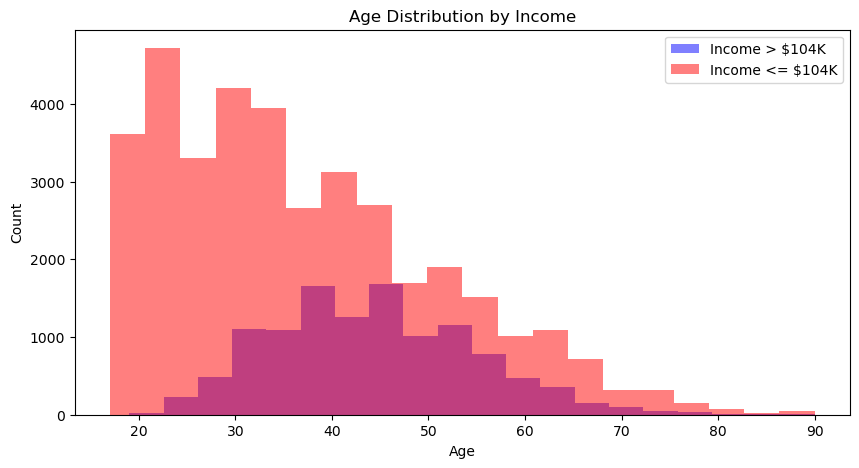

In [105]:
# Filter data for different income categories
income_gt_104k = adult_df[adult_df['INCOME_ADJUSTED'] == '>104K']
income_le_104k = adult_df[adult_df['INCOME_ADJUSTED'] == '<=104K']

# Create a histogram of age for income > 104K
plt.figure(figsize=(10, 5))
plt.hist(income_gt_104k['AGE'], bins=20, alpha=0.5, color='blue', label='Income > $104K')
plt.hist(income_le_104k['AGE'], bins=20, alpha=0.5, color='red', label='Income <= $104K')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Income')
plt.legend()
plt.show()

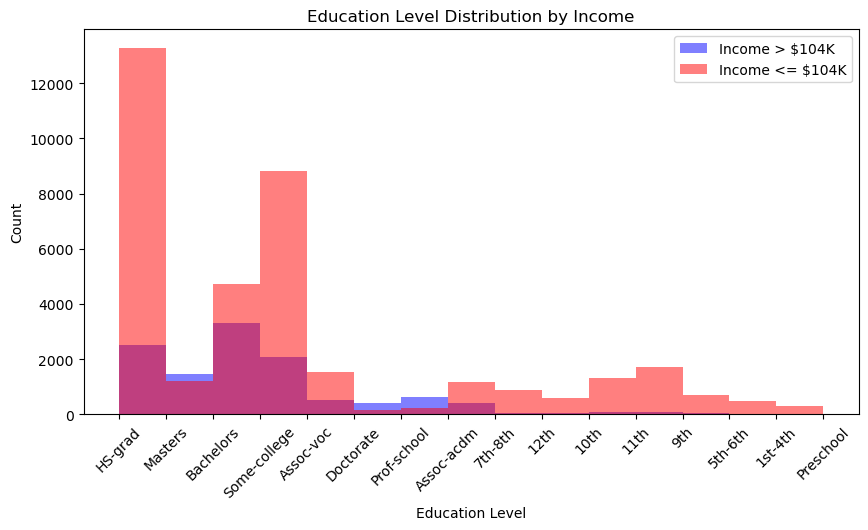

In [106]:
# Create a histogram of education for income > 50K
plt.figure(figsize=(10, 5))
plt.hist(income_gt_104k['EDUCATION'], bins=15, alpha=0.5, color='blue', label='Income > $104K')
plt.hist(income_le_104k['EDUCATION'], bins=15, alpha=0.5, color='red', label='Income <= $104K')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution by Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.show()

## 7. Converting Categorical data into dummy variables

Pandas provides a method to convert factors into dummy variables 

When we encounter categorical variables, we must utilize a method like dummy variable encoding or one-hot encoding. Since our target variable 'INCOME_ADJUSTED' is a binary we are encoding/mapping it >104k as 1 and <=104k as 0.

In [107]:
adult_df['INCOME_ADJUSTED'].unique()

['<=104K', '>104K']
Categories (2, object): ['<=104K', '>104K']

In [108]:
adult_df['INCOME_ADJUSTED'].str.strip()

0        <=104K
1        <=104K
2        <=104K
3        <=104K
4        <=104K
          ...  
48837    <=104K
48838    <=104K
48839    <=104K
48840    <=104K
48841     >104K
Name: INCOME_ADJUSTED, Length: 48842, dtype: object

In [109]:
# List of categorical columns to be one-hot encoded
categorical_columns = ["WORK_CLASS", "MARITAL_STATUS", "SEX","RACE","EDUCATION"]

# Apply one-hot encoding to the specified columns
adult_df = pd.get_dummies(adult_df, columns=categorical_columns)

# Now, data_encoded contains the one-hot encoded categorical variables
adult_df.head(10)

,AGE,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,INCOME_ADJUSTED,WORK_CLASS_Federal-gov,WORK_CLASS_Local-gov,WORK_CLASS_Never-worked,WORK_CLASS_Private,WORK_CLASS_Self-emp-inc,...,EDUCATION_9th,EDUCATION_Assoc-acdm,EDUCATION_Assoc-voc,EDUCATION_Bachelors,EDUCATION_Doctorate,EDUCATION_HS-grad,EDUCATION_Masters,EDUCATION_Preschool,EDUCATION_Prof-school,EDUCATION_Some-college
0,39,2174,0,40,<=104K,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,50,0,0,13,<=104K,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,38,0,0,40,<=104K,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,53,0,0,40,<=104K,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,28,0,0,40,<=104K,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,37,0,0,40,<=104K,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6,49,0,0,16,<=104K,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,52,0,0,45,>104K,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,31,14084,0,50,>104K,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9,42,5178,0,40,>104K,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


Now we are done with encoding our categorical variables into dummies, imputing missing values and special characters in our dataset with mode and all other pre-processing steps. Our data pre-processing is complete, we store this cleaned data in our csv file for running our models for classification on our income_adjusted variable. 

In [110]:
adult_df.to_csv('adult_data.csv', index=False)